In [1]:
# Add the current directory to the PYTHONPATH
import argparse
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import yaml

sys.path.append(os.path.abspath("/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/"))

from models import grad_cam_lib as cam


2025-03-06 14:37:38.477834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-06 14:37:38.477857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-06 14:37:38.478610: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 14:37:38.482860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-06 14:37:39.132254: W tensorflow/compiler/tf2

In [2]:
proj_path="/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/"

# functions

In [3]:
def load_config(config_path="config.yaml"):
    """
    Loads configuration from a YAML file.

    Parameters:
    - config_path (str): Path to the YAML configuration file.

    Returns:
    - dict: Dictionary with configuration parameters.
    """
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

In [4]:
def extract_classes(file_paths):
    classes = [path.split("/")[0] for path in file_paths]
    return classes

In [5]:
def load_imgs(path_data, images_labels, target_size=(224, 224)):
    images=[]
    for index in range(len(images_labels)):
        img_path = f"{path_data}{images_labels[index]}" 
        print(img_path)
        images.append(cam.load_img_gen(img_path, target_size, verbose=0))
    return images

# Config

In [6]:
config = load_config("/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/interpretation/config_class_well_k1.yaml")
print(config)

{'path_model': 'results/phase1/AT_densenet+cbam_exp/0_DenseNet201/0_DenseNet201_bestLoss_1.keras', 'nome': 'GradCAM_class_well1_k1.png', 'conv_layer_name': 'activation_1', 'img_size': 224, 'path_data': '/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/', 'images_labels': ['ceratonia/Fab.C.silX400wF(476)(0)B-15.png', 'eucalyptus/Myr.E.camaX400wF(1867)(0)B-10.png', 'sinapis/Bra.S.albX400wF(2155)(0)F-10.png', 'thymbra/x40 f (3)-3.png']}


# images labels

In [7]:
images_labels = config['images_labels']
print(images_labels)

['ceratonia/Fab.C.silX400wF(476)(0)B-15.png', 'eucalyptus/Myr.E.camaX400wF(1867)(0)B-10.png', 'sinapis/Bra.S.albX400wF(2155)(0)F-10.png', 'thymbra/x40 f (3)-3.png']


In [8]:
images_list=[]
print(images_labels)
for index in range(len(images_labels)): 
    images_list.append(images_labels[index])

['ceratonia/Fab.C.silX400wF(476)(0)B-15.png', 'eucalyptus/Myr.E.camaX400wF(1867)(0)B-10.png', 'sinapis/Bra.S.albX400wF(2155)(0)F-10.png', 'thymbra/x40 f (3)-3.png']


In [9]:
classes_list = extract_classes(images_list)
print(classes_list)

['ceratonia', 'eucalyptus', 'sinapis', 'thymbra']


# Load model

In [10]:
img_size = config['img_size']
target_size = (img_size, img_size)
path_data = config['path_data']
CATEGORIES = sorted(os.listdir(config['path_data']))

In [11]:
path_model =f"{proj_path}{config['path_model']}" 
print(path_model)

/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase1/AT_densenet+cbam_exp/0_DenseNet201/0_DenseNet201_bestLoss_1.keras


In [12]:
model=cam.load_model(path_model)

2025-03-06 14:37:40.115567: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-06 14:37:40.201916: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-06 14:37:40.202041: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

# Load images

In [13]:
images=load_imgs(path_data, images_list, target_size)

/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/ceratonia/Fab.C.silX400wF(476)(0)B-15.png
/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/eucalyptus/Myr.E.camaX400wF(1867)(0)B-10.png
/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/sinapis/Bra.S.albX400wF(2155)(0)F-10.png
/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1/thymbra/x40 f (3)-3.png


# Predict

In [14]:
conv_layer_name = config['conv_layer_name']
print(conv_layer_name)

activation_1


2025-03-06 14:40:57.548408: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


1/1 [==============================] - 3s 3s/step
Index: 3, Classe prevista: ceratonia, Probabilidade: 0.9993461966514587
1/1 [==============================] - 0s 24ms/step
Index: 6, Classe prevista: eucalyptus, Probabilidade: 0.999982476234436
1/1 [==============================] - 0s 24ms/step
Index: 16, Classe prevista: sinapis, Probabilidade: 0.9997419714927673
1/1 [==============================] - 0s 24ms/step
Index: 17, Classe prevista: thymbra, Probabilidade: 0.9997192025184631
4/4 [==============================] - 0s 94ms/step


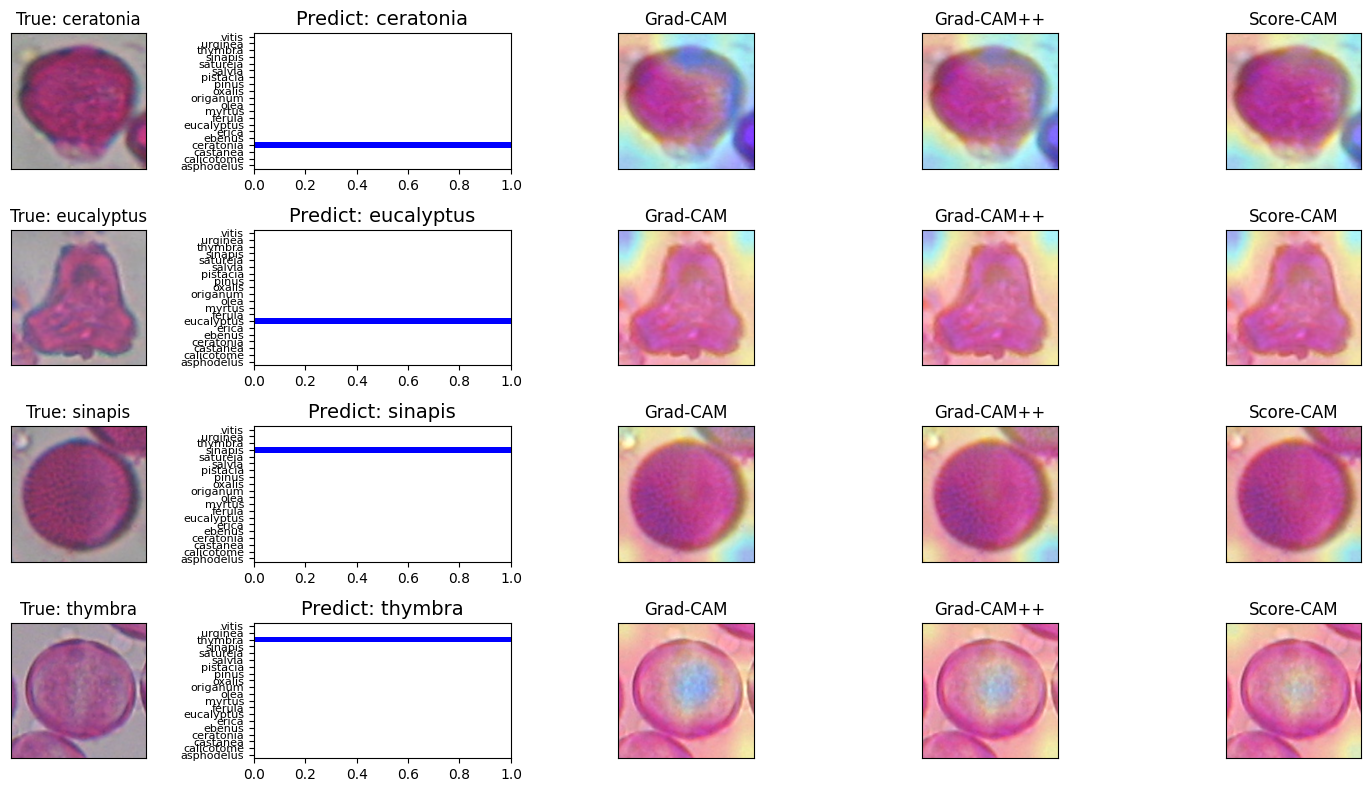

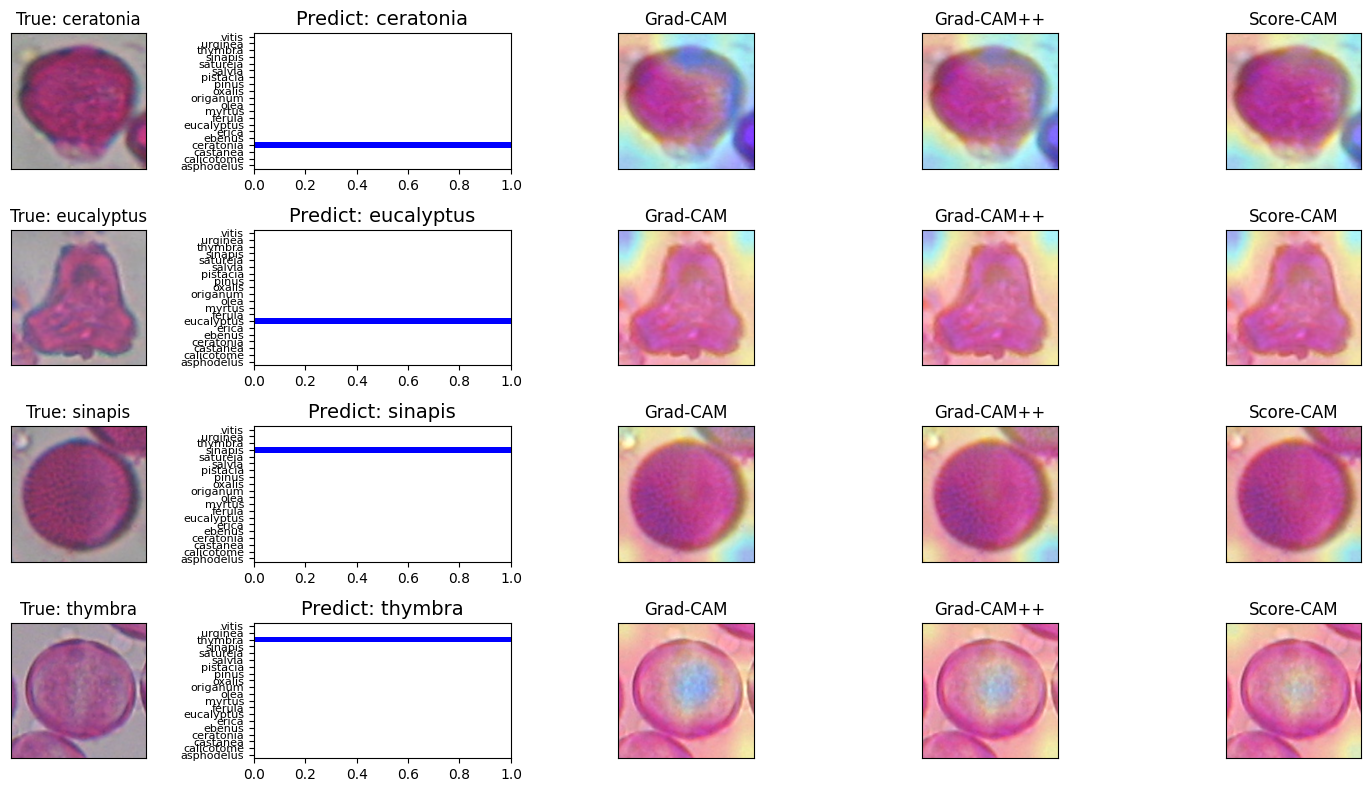

In [15]:
cam.display_cam_grid(images, classes_list, model, conv_layer_name, CATEGORIES)